In [2]:
import os
import glob
import pandas as pd
from datasets import load_from_disk

# Get latest curation output
data_dir = "/share/pi/nigam/users/calebwin/hf_cache/med-s1k"
latest_run = max(glob.glob(f"{data_dir}/plumbing_test_*"), key=os.path.getctime)
print(f"Loading data from: {latest_run}")

# Load filtered dataset (all examples with metadata)
filtered_df = pd.read_parquet(f"{latest_run}/med_s1k_filtered.parquet")
print(f"\nFiltered dataset shape: {filtered_df.shape}")

curated_df = pd.read_parquet(f"{latest_run}/med_s1k_curated.parquet")
print(f"\nCurated dataset shape: {curated_df.shape}")

# Show all columns
print("\nColumns in filtered dataset:")
for col in filtered_df.columns:
    print(f"- {col}")

/share/pi/nigam/users/calebwin/conda/envs/med-s1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading data from: /share/pi/nigam/users/calebwin/hf_cache/med-s1k/plumbing_test_001_20250219_145607

Filtered dataset shape: (25371, 22)

Curated dataset shape: (1000, 22)

Columns in filtered dataset:
- Question
- Complex_CoT
- Response
- curation_version
- curation_start_timestamp
- has_question
- has_cot
- has_response
- quality_score
- filter_status
- filter_stage
- filter_reason
- quality_filter_timestamp
- base_model_response
- base_model_correct
- base_model_judgment
- specialty
- specialty_label_timestamp
- difficulty_score
- cot_length
- selected_for_training
- diversity_sample_timestamp


In [3]:
# len(curated_df['specialty'].drop_duplicates())
curated_df

,Question,Complex_CoT,Response,curation_version,curation_start_timestamp,has_question,has_cot,has_response,quality_score,filter_status,...,quality_filter_timestamp,base_model_response,base_model_correct,base_model_judgment,specialty,specialty_label_timestamp,difficulty_score,cot_length,selected_for_training,diversity_sample_timestamp
15,What is the most likely direct cause of the 11...,"Okay, let's figure this out. We've got an 11-y...",The most likely direct cause of the 11-year-ol...,plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,"The patient's symptoms of vomiting, morning w...",False,The model answer correctly identifies increase...,Neurology with Special Qualification in Child ...,2025-02-19T14:55:31.821438,1.0,578,True,2025-02-19T14:56:06.134425
26,A 68-year-old woman presented with unstable an...,"Alright, so we have a 68-year-old woman here w...","A likely diagnosis for the 68-year-old woman, ...",plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,The patient underwent cardiac catheterization...,False,The model answer merely reiterates the given i...,Interventional Cardiology,2025-02-19T14:55:31.821438,1.0,448,True,2025-02-19T14:56:06.134425
53,"Given a gas initially at 700 psia and 540°R, w...","Alright, we need to figure out the heat transf...",To calculate the heat transfer to the gas and ...,plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,Determine the type of gas.\n2. Determine the ...,False,The model answer provides a high-level outline...,Physics,2025-02-19T14:55:31.821438,1.0,1057,True,2025-02-19T14:56:06.134425
77,"Using appropriate relations of similitude, cal...","Okay, let's get into this. First, I need to fi...",To achieve dynamic and thermal similarity betw...,plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,Determine the appropriate relations of simil...,False,The model answer provides a high-level outline...,Aerospace Medicine,2025-02-19T14:55:31.821438,1.0,569,True,2025-02-19T14:56:06.134425
93,A 38-year-old man comes to the physician becau...,"Alright, let's see what's going on with this g...","Given the information provided, the most likel...",plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,"The patient has a history of smoking, which i...",False,The model's answer only lists observations fro...,Gastroenterology,2025-02-19T14:55:31.821438,1.0,763,True,2025-02-19T14:56:06.134425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25221,"A 4-hour-old, 14 kg child presents with a 4-da...","Let's see, we have a pretty young one here, ju...",For a 14 kg child presenting with symptoms ind...,plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,Determine the child's fluid deficit.\n2. Calc...,False,"The model answer provides a high-level, concep...",Neonatal-Perinatal Medicine,2025-02-19T14:55:31.821438,1.0,651,True,2025-02-19T14:56:06.134425
25264,In the scenario of a 78-year-old woman brought...,"Okay, let's think about this situation with th...",The most appropriate next step in managing the...,plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,**Identify the key symptoms and signs**: The ...,False,The model answer and the correct answer differ...,Geriatric Medicine,2025-02-19T14:55:31.821438,1.0,548,True,2025-02-19T14:56:06.134425
25306,A 6-month-old boy is brought to the emergency ...,"Alright, so we have a 6-month-old boy here, an...","In this case, given the suspicion of child abu...",plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,The child is suspected of having a fracture o...,False,The model's answer only restates the given inf...,Child Abuse Pediatrics,2025-02-19T14:55:31.821438

In [4]:
(filtered_df['Question'].str.len() + filtered_df['Complex_CoT'].str.len() + filtered_df['Response'].str.len()).max(0)
# (filtered_df['Complex_CoT'].str.len().max(0), filtered_df['cot_length'].max(0))

8380

In [5]:
# Load curated dataset (selected examples)
curated_df = pd.read_parquet(f"{latest_run}/med_s1k_curated.parquet")
curated_df

,Question,Complex_CoT,Response,curation_version,curation_start_timestamp,has_question,has_cot,has_response,quality_score,filter_status,...,quality_filter_timestamp,base_model_response,base_model_correct,base_model_judgment,specialty,specialty_label_timestamp,difficulty_score,cot_length,selected_for_training,diversity_sample_timestamp
15,What is the most likely direct cause of the 11...,"Okay, let's figure this out. We've got an 11-y...",The most likely direct cause of the 11-year-ol...,plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,"The patient's symptoms of vomiting, morning w...",False,The model answer correctly identifies increase...,Neurology with Special Qualification in Child ...,2025-02-19T14:55:31.821438,1.0,578,True,2025-02-19T14:56:06.134425
26,A 68-year-old woman presented with unstable an...,"Alright, so we have a 68-year-old woman here w...","A likely diagnosis for the 68-year-old woman, ...",plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,The patient underwent cardiac catheterization...,False,The model answer merely reiterates the given i...,Interventional Cardiology,2025-02-19T14:55:31.821438,1.0,448,True,2025-02-19T14:56:06.134425
53,"Given a gas initially at 700 psia and 540°R, w...","Alright, we need to figure out the heat transf...",To calculate the heat transfer to the gas and ...,plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,Determine the type of gas.\n2. Determine the ...,False,The model answer provides a high-level outline...,Physics,2025-02-19T14:55:31.821438,1.0,1057,True,2025-02-19T14:56:06.134425
77,"Using appropriate relations of similitude, cal...","Okay, let's get into this. First, I need to fi...",To achieve dynamic and thermal similarity betw...,plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,Determine the appropriate relations of simil...,False,The model answer provides a high-level outline...,Aerospace Medicine,2025-02-19T14:55:31.821438,1.0,569,True,2025-02-19T14:56:06.134425
93,A 38-year-old man comes to the physician becau...,"Alright, let's see what's going on with this g...","Given the information provided, the most likel...",plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,"The patient has a history of smoking, which i...",False,The model's answer only lists observations fro...,Gastroenterology,2025-02-19T14:55:31.821438,1.0,763,True,2025-02-19T14:56:06.134425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25221,"A 4-hour-old, 14 kg child presents with a 4-da...","Let's see, we have a pretty young one here, ju...",For a 14 kg child presenting with symptoms ind...,plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,Determine the child's fluid deficit.\n2. Calc...,False,"The model answer provides a high-level, concep...",Neonatal-Perinatal Medicine,2025-02-19T14:55:31.821438,1.0,651,True,2025-02-19T14:56:06.134425
25264,In the scenario of a 78-year-old woman brought...,"Okay, let's think about this situation with th...",The most appropriate next step in managing the...,plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,**Identify the key symptoms and signs**: The ...,False,The model answer and the correct answer differ...,Geriatric Medicine,2025-02-19T14:55:31.821438,1.0,548,True,2025-02-19T14:56:06.134425
25306,A 6-month-old boy is brought to the emergency ...,"Alright, so we have a 6-month-old boy here, an...","In this case, given the suspicion of child abu...",plumbing_test_001,2025-02-19T13:55:54.396118,True,True,True,3,kept,...,2025-02-19T13:55:54.436332,The child is suspected of having a fracture o...,False,The model's answer only restates the given inf...,Child Abuse Pediatrics,2025-02-19T14:55:31.821438

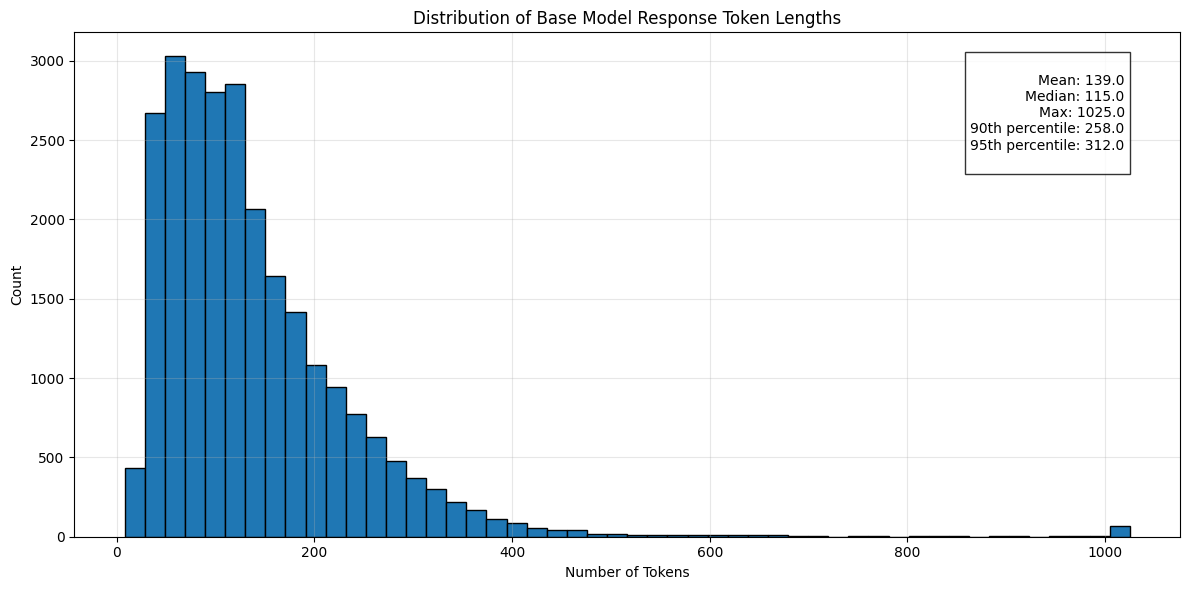

Responses with length >= 0: 25371 (100.0%)
Responses with length >= 200: 5071 (20.0%)
Responses with length >= 400: 426 (1.7%)
Responses with length >= 500: 209 (0.8%)
Responses with length >= 1000: 65 (0.3%)
Responses with length >= 1024: 63 (0.2%)
Responses with length >= 1500: 0 (0.0%)
Responses with length >= 2000: 0 (0.0%)
Responses with length >= 2500: 0 (0.0%)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from transformers import AutoTokenizer

# Load config to get base model tokenizer
with open("../config.json", "r") as f:
    config = json.load(f)
model_config = config["models"][config["model_choices"]["base"]]
tokenizer = AutoTokenizer.from_pretrained(model_config["hf_path"], token="")

# Count tokens in base model responses
def count_tokens(text):
    return len(tokenizer(text).input_ids)

# Calculate token lengths
filtered_df['base_response_tokens'] = filtered_df['base_model_response'].apply(count_tokens)

# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(filtered_df['base_response_tokens'], bins=50, edgecolor='black')
plt.title('Distribution of Base Model Response Token Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# Add statistics as text
stats = f"""
Mean: {filtered_df['base_response_tokens'].mean():.1f}
Median: {filtered_df['base_response_tokens'].median():.1f}
Max: {filtered_df['base_response_tokens'].max():.1f}
90th percentile: {filtered_df['base_response_tokens'].quantile(0.9):.1f}
95th percentile: {filtered_df['base_response_tokens'].quantile(0.95):.1f}
"""
plt.text(0.95, 0.95, stats, 
         transform=plt.gca().transAxes, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print distribution above thresholds
thresholds = [0, 200, 400, 500, 1000, 1024, 1500, 2000, 2500]
for t in thresholds:
    n_above = (filtered_df['base_response_tokens'] >= t).sum()
    pct_above = (n_above / len(filtered_df)) * 100
    print(f"Responses with length >= {t}: {n_above} ({pct_above:.1f}%)")

In [7]:
# Load formatted dataset (ready for training)
formatted_dataset = load_from_disk(f"{latest_run}/med_s1k_formatted")
print(f"\nFormatted dataset:")
print(f"- Train split: {len(formatted_dataset['train'])} examples")
print(f"- Test split: {len(formatted_dataset['test'])} examples")

# Inspect filtering stages
print("\nFiltering breakdown:")
stage_counts = filtered_df.groupby(['filter_stage', 'filter_reason']).size().unstack(fill_value=0)
print(stage_counts)


Formatted dataset:
- Train split: 900 examples
- Test split: 100 examples

Filtering breakdown:
filter_reason  base_model_correct  not_selected_in_sampling
filter_stage                                               
difficulty                   6964                         0
diversity                       0                     17407


In [8]:
# Inspect one example that was kept
idx = 0
kept_example = filtered_df[filtered_df['selected_for_training']].iloc[idx]
print(f"QUESTION: {kept_example['Question']}")
print(f"\nACTUAL: {kept_example['base_model_response']}")
print(f"\nCORRECT: {kept_example['Response']}")
print(f"\nJUDGMENT: {kept_example['base_model_correct']}")
print(f"\nJUDGMENT RATIONALE: {kept_example['base_model_judgment']}")
print(f"\nSPECIALTY: {kept_example['specialty']}")
print(f"\nTRACE LENGTH: {kept_example['cot_length']}")

QUESTION: What is the most likely direct cause of the 11-year-old boy's symptoms of vomiting, morning worsening of symptoms, occasional headaches, and mild narrowing of visual fields, considering his intact cranial nerves and visual symptoms?

ACTUAL:  The patient's symptoms of vomiting, morning worsening of symptoms, occasional headaches, and mild narrowing of visual fields suggest a condition that affects the brain or central nervous system.
2. The intact cranial nerves indicate that the condition is not causing significant damage to the cranial nerves, which are responsible for controlling various functions such as vision, hearing, and facial movements.
3. The mild narrowing of visual fields suggests a condition that affects the optic nerve or the visual pathway.
4. Considering the patient's age and symptoms, a possible cause could be increased intracranial pressure (ICP), which can be caused by a variety of conditions such as hydrocephalus, tumors, or other space-occupying lesions.

In [9]:
# Verify formatted example
# Note these won't match because the dataset is shuffled
idx = 3
formatted_dataset['train'][idx]['text']

"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 26 Jul 2024\n\n<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nAn antiepileptic drug was found successful for the treatment of tonic hind limb extension (THLE). For which type of seizure can this drug be used?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n<|start_header_id|>think<|end_header_id|>\nI'm thinking about the tonic hind limb extension, or THLE. It's something often seen in animal studies, like the ones with rats or mice, during seizures. That's interesting because they use it to study seizures, particularly those that look like generalized ones. Hmm, how does this connect to actual seizure types people experience?\n\nSo, let me break this down a bit more. Generalized tonic-clonic seizures are quite common and have two phases, right? First, there's that tonic phase where the whole body stiffens. That's exactly what THLE seems to mimic in those r

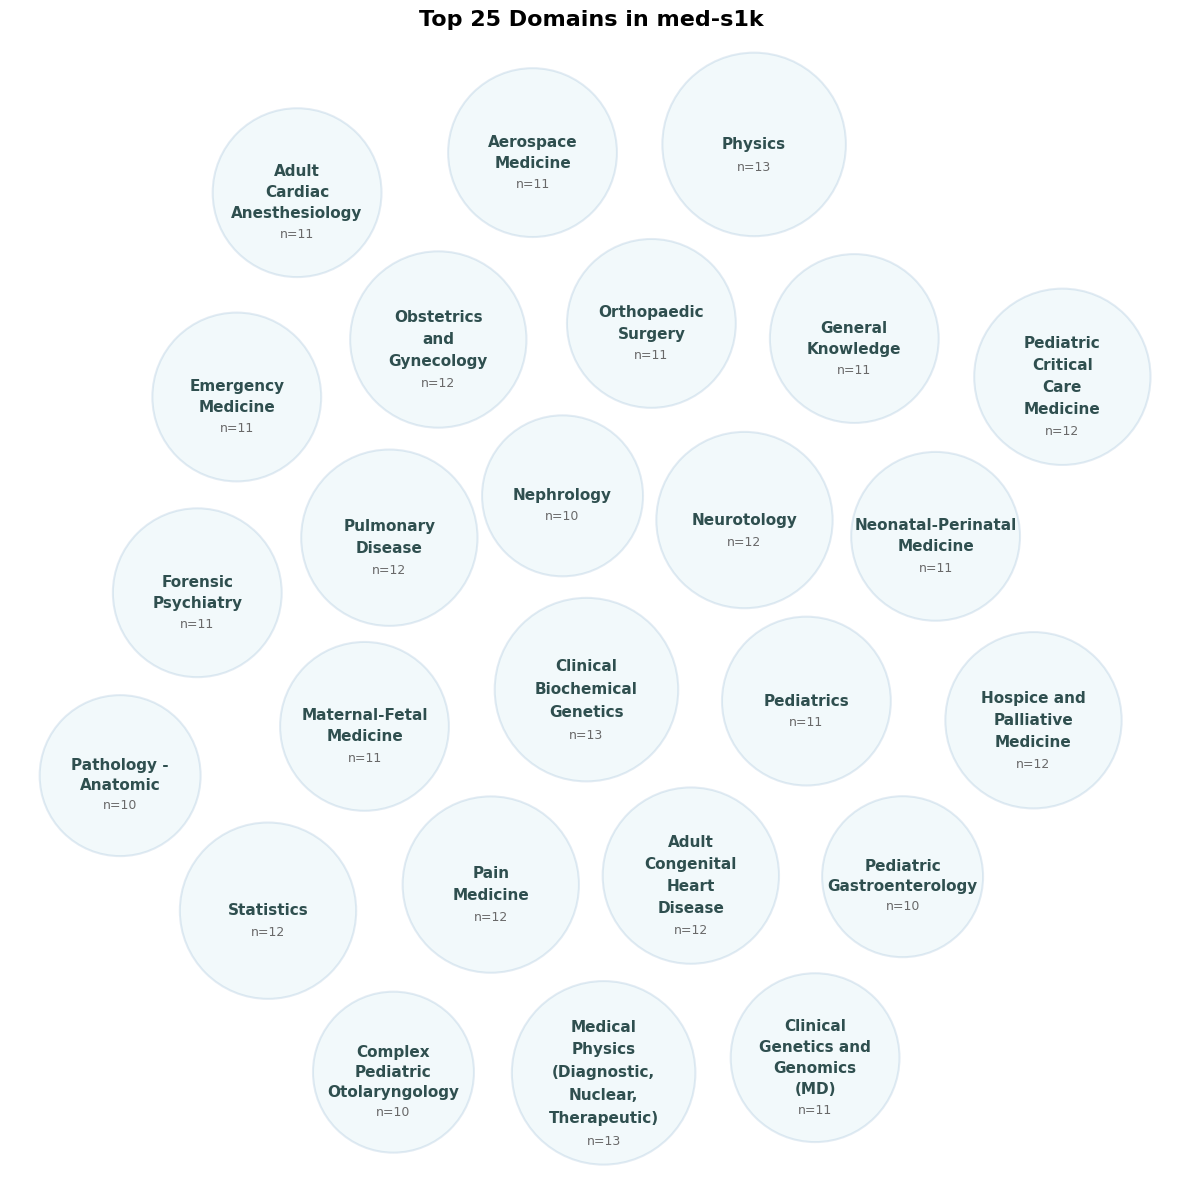

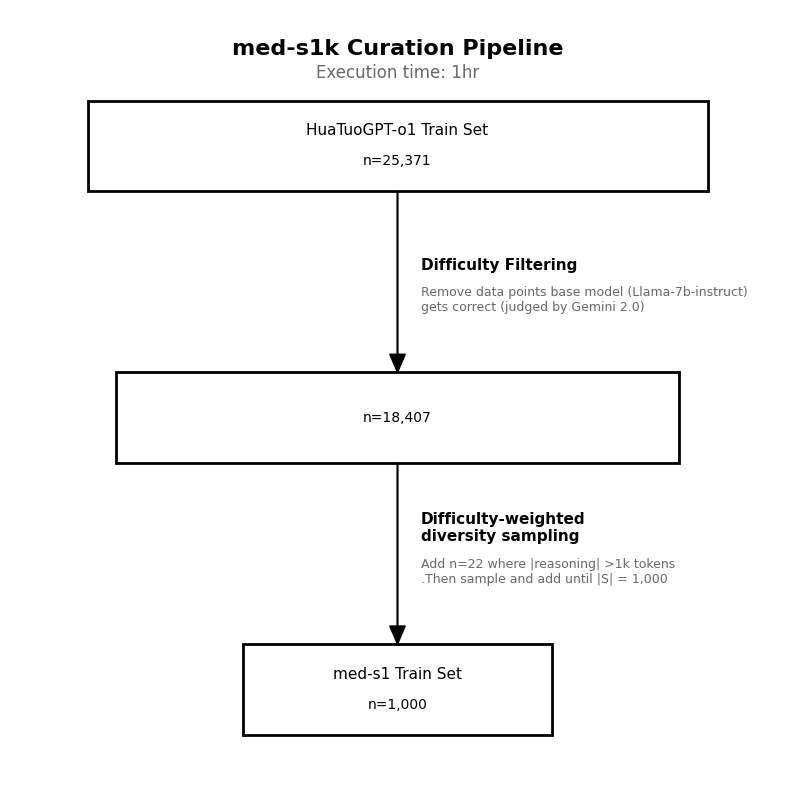

In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Rectangle
import math
import textwrap

def load_metadata(path):
    with open(path, 'r') as f:
        return json.load(f)

def force_directed_layout(sizes, n_iterations=100):
    n = len(sizes)
    pos = np.random.randn(n, 2)
    pos *= np.mean(sizes) * 3
    
    for _ in range(n_iterations):
        for i in range(n):
            for j in range(n):
                if i != j:
                    diff = pos[i] - pos[j]
                    dist = np.linalg.norm(diff)
                    min_dist = (sizes[i] + sizes[j]) * 1.3
                    if dist < min_dist:
                        force = diff / (dist + 1e-6) * (min_dist - dist) * 0.2
                        pos[i] += force
                        pos[j] -= force
        
        center_force = 0.02
        pos -= pos * center_force
    
    return pos

def get_wrapped_text(text, width=15):
    """Wrap text and return lines and total height"""
    words = text.split()
    lines = []
    current_line = []
    current_width = 0
    
    for word in words:
        word_len = len(word)
        if current_width + word_len + len(current_line) <= width:
            current_line.append(word)
            current_width += word_len
        else:
            if current_line:
                lines.append(' '.join(current_line))
            current_line = [word]
            current_width = word_len
    
    if current_line:
        lines.append(' '.join(current_line))
    
    return lines

def create_bubble_chart(specialty_dist, top_k=25):
    plt.figure(figsize=(15, 15), facecolor='white')
    ax = plt.gca()
    ax.set_facecolor('white')
    
    sorted_items = sorted(specialty_dist.items(), key=lambda x: x[1], reverse=True)[:top_k]
    specialties, counts = zip(*sorted_items)
    
    sizes = np.array(counts)
    sizes = 400 * np.sqrt(sizes / sizes.max())
    
    positions = force_directed_layout(sizes)
    
    for i, (specialty, count, size) in enumerate(zip(specialties, counts, sizes)):
        # Create bubble
        circle = Circle(positions[i], size, 
                       alpha=0.15,
                       color='#ADD8E6',
                       ec='#4682B4',
                       linewidth=1.5)
        ax.add_patch(circle)
        
        # Calculate text wrapping and positioning
        max_width = max(10, int(size/30))
        lines = get_wrapped_text(specialty, width=max_width)
        n_lines = len(lines)
        
        # Calculate vertical spacing
        line_height = size/4
        total_text_height = n_lines * line_height
        
        # Start position for text (top of text block)
        text_start_y = positions[i][1] + total_text_height/2 - line_height/2
        
        # Draw each line of the specialty name
        for j, line in enumerate(lines):
            y_pos = text_start_y - j * line_height
            plt.text(positions[i][0], y_pos,
                    line,
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=min(11, size/20),
                    fontweight='bold',
                    color='#2F4F4F')
        
        # Position count below the text block
        count_y = text_start_y - total_text_height
        plt.text(positions[i][0], count_y,
                f'n={count}',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=min(9, size/25),
                color='#696969')
    
    ax.set_aspect('equal')
    
    all_positions = np.vstack(positions)
    max_size = np.max(sizes)
    margin = max_size * 1.2
    
    xlim = [np.min(all_positions[:,0]) - margin, np.max(all_positions[:,0]) + margin]
    ylim = [np.min(all_positions[:,1]) - margin, np.max(all_positions[:,1]) + margin]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    plt.title(f'Top {top_k} Domains in med-s1k', 
              fontsize=16,
             fontweight='bold')
    
    return plt.gcf()

def create_filtering_diagram(metadata):
    fig, ax = plt.subplots(figsize=(10, 10))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    total = metadata['filtering_stats']['overall']['total']
    stages = metadata['filtering_stats']['by_stage']
    final_size = metadata['dataset_info']['final_size']

    # Adjust vertical positions to reduce whitespace
    y_positions = np.linspace(0.8, 0.2, 3)
    box_height = 0.1
    
    def scale_width(size):
        return 0.3 + 0.5 * (size / total) ** 0.5

    # Initial box
    width = scale_width(total)
    rect = Rectangle((0.5-width/2, y_positions[0]-box_height/2),
                    width, box_height,
                    facecolor='none',
                    edgecolor='black',
                    linewidth=2)
    ax.add_patch(rect)
    
    # Add text inside the box
    plt.text(0.5, y_positions[0] + box_height/6,
             'HuaTuoGPT-o1 Train Set',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=11)
    plt.text(0.5, y_positions[0] - box_height/6,
             f'n={total:,}',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=10)

    current_count = total
    
    # Updated arrow labels with adjusted text
    arrow_labels = [
        ('Difficulty Filtering',
         'Remove data points base model (Llama-7b-instruct)\ngets correct (judged by Gemini 2.0)'),
        ('Difficulty-weighted\ndiversity sampling',
         'Add n=22 where |reasoning| >1k tokens\n.Then sample and add until |S| = 1,000')
    ]

    # Track intermediate counts
    counts = [total]
    for stage_data in stages.values():
        current_count -= stage_data['count']
        counts.append(current_count)
    counts.append(final_size)

    for i, ((stage_name, stage_data), (label, sublabel)) in enumerate(zip(stages.items(), arrow_labels)):
        next_width = scale_width(counts[i+1])
        
        # Draw longer arrows
        arrow_start = y_positions[i] - box_height/2
        arrow_end = y_positions[i+1] + box_height/2
        arrow_length = arrow_start - arrow_end
        
        plt.arrow(0.5, arrow_start,
                 0, arrow_end - arrow_start,
                 head_width=0.02, head_length=0.02,
                 fc='black', ec='black',
                 length_includes_head=True)
        
        # Position labels closer to arrows with less vertical spacing
        mid_point = (arrow_start + arrow_end) / 2
        plt.text(0.53, mid_point + 0.01,
                label,
                horizontalalignment='left',
                verticalalignment='bottom',
                fontsize=11,
                fontweight='bold')
        plt.text(0.53, mid_point - 0.005,
                sublabel,
                horizontalalignment='left',
                verticalalignment='top',
                fontsize=9,
                color='#696969')
        
        # Draw next box
        rect = Rectangle((0.5-next_width/2, y_positions[i+1]-box_height/2),
                        next_width, box_height,
                        facecolor='none',
                        edgecolor='black',
                        linewidth=2)
        ax.add_patch(rect)
        
        # Add text for middle box
        if i == 0:
            plt.text(0.5, y_positions[i+1],
                    f'n={counts[i+1]:,}',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=10)
        elif i == len(stages) - 1:  # Final box
            plt.text(0.5, y_positions[i+1] + box_height/6,
                    'med-s1 Train Set',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=11)
            plt.text(0.5, y_positions[i+1] - box_height/6,
                    f'n={final_size:,}',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=10)

    # Title and subtitle with minimal spacing
    plt.text(0.5, 0.9, 'med-s1k Curation Pipeline',
             horizontalalignment='center',
             fontsize=16,
             fontweight='bold')
    plt.text(0.5, 0.875, 'Execution time: 1hr',
             horizontalalignment='center',
             fontsize=12,
             color='#696969')
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0.1, 0.95)
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

    return fig


# Load metadata
metadata = load_metadata('/share/pi/nigam/users/calebwin/hf_cache/med-s1k/plumbing_test_001_20250219_145607/metadata.json')

# Create bubble chart
bubble_fig = create_bubble_chart(metadata['filtering_stats']['specialty_distribution'])
bubble_fig.savefig('specialty_distribution.png', 
                   bbox_inches='tight', 
                   dpi=300,
                   facecolor='white')

# Create filtering diagram
filter_fig = create_filtering_diagram(metadata)
filter_fig.savefig('filtering_process.png', 
                   bbox_inches='tight', 
                   dpi=300,
                   facecolor='white')

In [11]:
curated_df.to_csv("med_s1k.csv")

In [16]:
pd.read_parquet("/share/pi/nigam/users/calebwin/hf_cache/med-s1k/random-1k_20250227_045807/med_s1k_curated.parquet")["specialty"].drop_duplicates().count()

105

In [17]:
pd.read_parquet("/share/pi/nigam/users/calebwin/hf_cache/med-s1k/plumbing_test_001_20250219_145607/med_s1k_curated.parquet")["specialty"].drop_duplicates().count()

141

In [19]:
pd.read_parquet("/share/pi/nigam/users/calebwin/hf_cache/med-s1k/random-1k_20250227_045807/med_s1k_curated.parquet")["cot_length"].mean()

420.677

In [20]:
pd.read_parquet("/share/pi/nigam/users/calebwin/hf_cache/med-s1k/plumbing_test_001_20250219_145607/med_s1k_curated.parquet")["cot_length"].mean()

611.57